## Comparing Bayesian Models: The Widely Applicable Information Criterion
   
The Widely Applicable Information Criterion (WAIC) is an information criterion (such as AIC or BIC) that can be used in Bayesian models. The interesting aspect of the WAIC is that it is completely based on the likelihood of the posterior predictions. To compute the WAIC we have simply to be able to compute samples from the posterior, no matter which kind of posterior we are working with.

Let's $y_i$ be a target point in the training sample, we define $Pr(y_i)$ the average likelihood of the point under our model. This means that for each combination of posterior parameters of our model we can compute the associated likelihood of the point, and then average across all the likelihoods. This quantity is called *log-pointwise-predictive-density* (lppd):

$$ lppd = \sum_{i=1}^N \log[Pr(y_i)]. $$

This is the equivalent of the deviance that is computed when computing the AIC. 
While *lppd* accounts for model fit, the second part of WAIC should penalize model complexity. Instead of computing the number of parameters, as in AIC or BIC, WAIC computed the variance $V(y_i)$ of the log-likelihood associated to each data point. In practice, we compute the likelihood of $y_i$ for each combination of parameters from our posterior, and then we compute the variance of these quantities. We therefore define the effective number of parameters $p_{WAIC}$ as:

$$ p_{WAIC} = \sum_{i=1}^N V(y_i) .$$

WAIC is finally defined as 

$$ WAIC = -2 (lppd - p_{WAIC}) $$



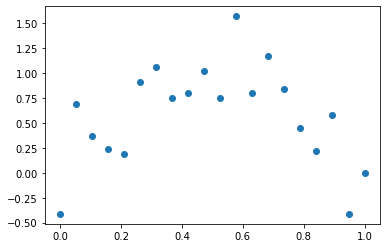

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 20
noise = 0.3
x = np.linspace(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)

data_synth = pd.DataFrame({'x' : x, 'y' : y})

plt.scatter(x,y)

In [2]:
%run tools.py

degree = 9
likelihood = 'gaussian'

models = []

for i in range(degree):
    
    data_poly = pd.DataFrame({'y' : y})

    priors = []

    prior_a_mean = 0
    prior_a_sigma = 5
    prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

    priors.append(prior_a)
    
    if i > 0:
        expr = 'y ~ '
        for k in range(1,i+1):
            if k>1:
                expr = expr + '+'
            prior_param_mean = 0
            prior_param_sigma = 5
            prior_param = ['gaussian', [prior_param_mean, prior_param_sigma]]
            priors.append(prior_param)
            data_poly['x'+str(k)] = x**k
            expr = expr + 'x' + str(k)

    sigma_inf = 0.1
    sigma_sup = 5
    prior_sigma_unif = [sigma_inf, sigma_sup]
    prior_sigma = ['uniform', prior_sigma_unif]

    priors.append(prior_sigma)
    
    if i > 0:
        models.append(laplace_solution_regression(expr, data_poly, likelihood, priors))
    else:
        models.append(laplace_solution([1,1],[],data_poly['y'], likelihood, priors))   

      fun: 18.3731945304786
 hess_inv: array([[1.21560808e-02, 3.41158670e-05],
       [3.41158670e-05, 6.17757087e-03]])
      jac: array([-2.38418579e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([0.57843264, 0.49287281])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 20.895176606850256
 hess_inv: array([[ 4.48756747e-02, -6.55365998e-02, -3.80292937e-05],
       [-6.55365998e-02,  1.31198711e-01,  7.25471769e-05],
       [-3.80292937e-05,  7.25471769e-05,  6.07247264e-03]])
      jac: array([-2.38418579e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 102
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([ 0.59888576, -0.04092572,  0.49270257])
      fun: 14.293986473402938
 hess_inv: array([[ 0.03232563, -0.120358  ,  0.09595806,  0.00065389],
       [-0.120358  ,  0.65305889, -0.60642463, -0.00329559],
       [ 0.09595806, -0.60642463,  0.60785712,  0.00335339],
       [ 0.00065389, -0.00329559,  0.00335339,  0.00220703]])
      jac: array([ 9.53674316e-07,  7.15255737e-07,  4.76837158e-07, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 145
      nit: 22
     njev: 29
   status: 0
  success: True
        x: array([-0.11060526, 

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 16.1614830486292
 hess_inv: array([[ 3.70225237e-02, -1.98817035e-01,  3.02162541e-01,
        -1.40110484e-01,  2.62797137e-04],
       [-1.98817035e-01,  1.83200195e+00, -3.74424456e+00,
         2.13853426e+00, -3.00081669e-03],
       [ 3.02162541e-01, -3.74424456e+00,  9.03234132e+00,
        -5.76378382e+00,  5.65388151e-03],
       [-1.40110484e-01,  2.13853426e+00, -5.76378382e+00,
         3.95032943e+00, -2.70420041e-03],
       [ 2.62797137e-04, -3.00081669e-03,  5.65388151e-03,
        -2.70420041e-03,  2.19629964e-03]])
      jac: array([-2.14576721e-06, -1.66893005e-06, -1.90734863e-06, -1.90734863e-06,
       -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 216
      nit: 25
     njev: 35
   status: 0
  success: True
        x: array([-0.03324515,  3.24720588, -1.17065672, -2.32237166,  0.29691158])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 18.67771010920695
 hess_inv: array([[ 3.99481274e-02, -2.08137188e-01,  2.62111875e-01,
        -7.00488594e-03, -8.70310964e-02,  3.77203574e-04],
       [-2.08137188e-01,  1.87008723e+00, -3.52999724e+00,
         1.27412390e+00,  6.50920351e-01, -4.80056164e-03],
       [ 2.62111875e-01, -3.52999724e+00,  9.68578972e+00,
        -8.23614062e+00,  1.67554958e+00,  5.79636186e-03],
       [-7.00488594e-03,  1.27412390e+00, -8.23614062e+00,
         1.47162428e+01, -7.80621364e+00,  9.78761512e-03],
       [-8.70310964e-02,  6.50920351e-01,  1.67554958e+00,
        -7.80621364e+00,  5.75710094e+00, -1.16613607e-02],
       [ 3.77203574e-04, -4.80056164e-03,  5.79636186e-03,
         9.78761512e-03, -1.16613607e-02,  2.28708989e-03]])
      jac: array([ 3.09944153e-06,  1.19209290e-06,  0.00000000e+00, -2.38418579e-07,
       -4.76837158e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 289
      nit: 30
     njev: 41
   status: 0
  success:

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 21.166235893347825
 hess_inv: array([[ 3.96920011e-02, -2.08316020e-01,  2.48613277e-01,
         5.59846610e-03, -4.79724256e-02, -4.05849752e-02,
         8.40135244e-04],
       [-2.08316020e-01,  1.87864343e+00, -3.58285773e+00,
         1.35567426e+00,  9.03990973e-01, -3.18791481e-01,
        -4.18792441e-03],
       [ 2.48613277e-01, -3.58285773e+00,  1.04915014e+01,
        -8.67575428e+00, -1.24363899e+00,  2.77064558e+00,
         1.21537401e-03],
       [ 5.59846610e-03,  1.35567426e+00, -8.67575428e+00,
         1.46826929e+01, -6.30489007e+00, -1.19885737e+00,
         5.78034391e-03],
       [-4.79724256e-02,  9.03990973e-01, -1.24363899e+00,
        -6.30489007e+00,  1.44356784e+01, -7.81681116e+00,
         1.70816665e-03],
       [-4.05849752e-02, -3.18791481e-01,  2.77064558e+00,
        -1.19885737e+00, -7.81681116e+00,  6.82803785e+00,
        -5.90688976e-03],
       [ 8.40135244e-04, -4.18792441e-03,  1.21537401e-03,
         5.78034391e-03,  1.70816665

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 23.584479310311686
 hess_inv: array([[ 3.37986048e-02, -1.70693571e-01,  1.72357335e-01,
         6.68056249e-02, -6.16520659e-02, -7.38362808e-02,
         3.15459840e-02,  5.85263673e-04],
       [-1.70693571e-01,  1.67561580e+00, -3.15988570e+00,
         6.37105336e-01,  1.39152247e+00,  4.30194287e-01,
        -7.81675439e-01, -2.37817721e-03],
       [ 1.72357335e-01, -3.15988570e+00,  9.43294521e+00,
        -6.09069661e+00, -3.89283343e+00,  1.43031660e+00,
         2.11743756e+00, -3.10202676e-03],
       [ 6.68056249e-02,  6.37105336e-01, -6.09069661e+00,
         1.03461911e+01, -6.85342670e-01, -6.86032785e+00,
         2.49044200e+00,  2.80967788e-03],
       [-6.16520659e-02,  1.39152247e+00, -3.89283343e+00,
        -6.85342670e-01,  5.48831570e+00,  3.20056670e+00,
        -5.53006559e+00,  7.59722657e-03],
       [-7.38362808e-02,  4.30194287e-01,  1.43031660e+00,
        -6.86032785e+00,  3.20056670e+00,  7.45416594e+00,
        -5.56123724e+00,  4.10360996

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 25.970483044049445
 hess_inv: array([[ 3.52274234e-02, -1.96522598e-01,  2.50339328e-01,
         2.51936603e-02, -6.92588570e-02, -7.83427006e-02,
        -3.12995990e-02,  6.43027062e-02, -5.18479892e-06],
       [-1.96522598e-01,  1.97583565e+00, -3.86864741e+00,
         7.23896716e-01,  1.50650771e+00,  9.41170876e-01,
         1.71764867e-02, -1.10413240e+00,  9.09234032e-04],
       [ 2.50339328e-01, -3.86864741e+00,  1.10837454e+01,
        -6.78494531e+00, -3.28301447e+00, -1.94811209e-01,
         5.93133989e-01,  2.26677650e+00, -4.14610580e-03],
       [ 2.51936603e-02,  7.23896716e-01, -6.78494531e+00,
         1.36033669e+01, -4.90930096e+00, -5.89307044e+00,
         1.91067279e+00,  1.28437766e+00, -6.76436405e-04],
       [-6.92588570e-02,  1.50650771e+00, -3.28301447e+00,
        -4.90930096e+00,  1.14270878e+01,  2.56313413e+00,
        -8.35234691e+00,  1.01099322e+00,  2.63885331e-03],
       [-7.83427006e-02,  9.41170876e-01, -1.94811209e-01,
        -5

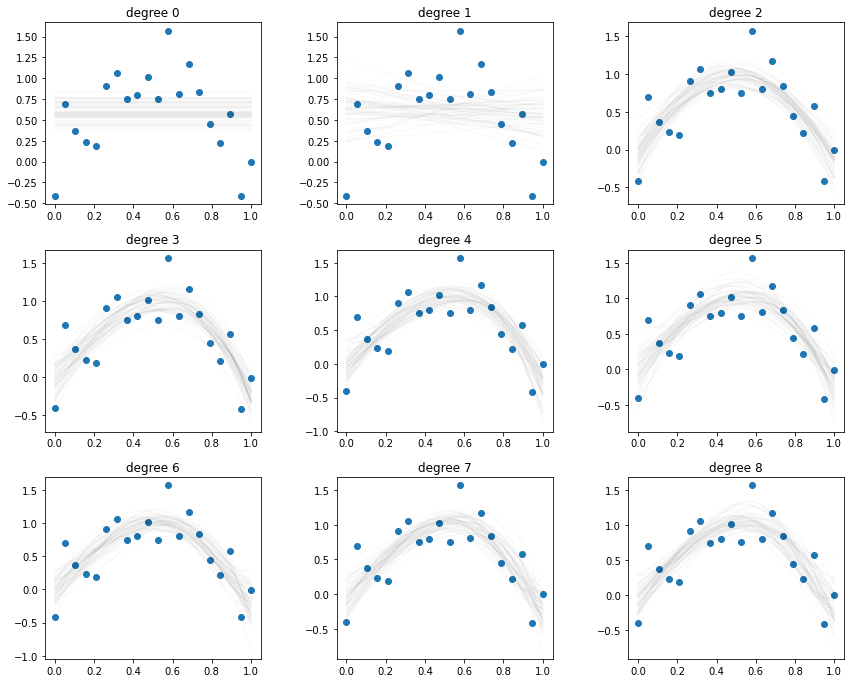

In [3]:
N_samp = 50

for i in range(degree):
    plt.subplot(int(float(degree)/3)+1,3,i+1)

    samples = post_sample_Laplace(models[i], N_samp)
    for l in range(N_samp):
        if i>0:
            pred = np.sum([x**k * samples[l,k] for k in range(i+1)],0)
        else:
            pred = x**0 * samples[l,0]
        plt.plot(x,pred, color = 'black', alpha = 0.02)
    
    plt.scatter(x,y)
    plt.title('degree ' + str(i))    
    plt.subplots_adjust(top=3, bottom=0.001, left=0.10, right=1.95, hspace=0.25,wspace=0.35)

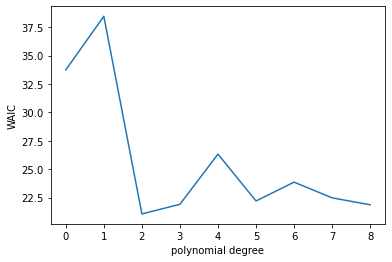

In [4]:
import scipy

WAIC = []

N_samp = 1000

for i in range(degree):
    lppd = 0
    p_waic = 0
    samples = post_sample_Laplace(models[i], N_samp)
    for k,target in enumerate(y):
        log_p = []
        for l in range(len(samples)):
            if i>0:
                pred = np.sum([x[k]**j * samples[l,j] for j in range(i+1)],0)
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
            else:
                pred = x[k]**0 * samples[l,0]
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
    
        lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
        p_waic += np.var(log_p)
    
#    print(lppd, p_waic)
    
    WAIC.append(-2*( lppd - p_waic))   

plt.plot(range(degree),WAIC)
plt.xticks(range(degree))
plt.xlabel('polynomial degree')
plt.ylabel('WAIC')
plt.show()

**Exercise.** Compare a polynomial model of order 1 to the polynomial model of order 4 with Stan

In [5]:
import pystan
from pystan.constants import MAX_UINT

import os

os.environ["CC"] = "g++-10"
os.environ["CXX"] = "g++-10"

In [6]:
poly_model_1_code = """
data {
    int<lower=1> N;
    vector[N] y;
    vector[N] x1;
    real mu_a;
    real<lower=0> std_a;
    real mu_b1;
    real<lower=0> std_b1;
}
parameters {
    real a;
    real b1;
    real<lower=1e-4> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = a + b1 * x1 ; 
}
model {
    b1 ~ normal(mu_b1, std_b1);
    a ~ normal(mu_a, std_a);
    y ~ normal(mu, sigma);
}
"""
model2 = pystan.StanModel(model_code = poly_model_1_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f099d5d39952dc79827a33676111323f NOW.


In [7]:
data_poly1 = pd.DataFrame({'x1' : x, 'y' : y})

In [8]:
seed = np.random.randint(0, MAX_UINT, size=1)[0]

mu_a = 0
std_a = 3

mu_b1 = 0
std_b1 = 2

In [9]:
fit2 = model2.sampling(data=
                        dict(x1 = data_poly1.x1, 
                             y = data_poly1.y, 
                             mu_a = mu_a, 
                             std_a = std_a, 
                             mu_b1 = mu_b1, 
                             std_b1 = std_b1, 
                             N = N), 
                       seed=seed, iter=2000, chains=4)

In [10]:
fit2

Inference for Stan model: anon_model_f099d5d39952dc79827a33676111323f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        0.59  5.8e-3   0.24   0.11   0.43   0.59   0.75   1.06   1693    1.0
b1      -0.03    0.01   0.41  -0.85   -0.3  -0.03   0.24   0.81   1629    1.0
sigma    0.56  2.6e-3    0.1    0.4   0.49   0.54   0.62   0.79   1542    1.0
mu[1]    0.59  5.8e-3   0.24   0.11   0.43   0.59   0.75   1.06   1693    1.0
mu[2]    0.59  5.3e-3   0.22   0.15   0.45   0.59   0.73   1.02   1730    1.0
mu[3]    0.59  4.9e-3    0.2   0.18   0.45   0.59   0.72    1.0   1778    1.0
mu[4]    0.59  4.4e-3   0.19   0.21   0.46   0.59   0.71   0.96   1847    1.0
mu[5]    0.58  3.9e-3   0.17   0.24   0.47   0.58    0.7   0.93   1945    1.0
mu[6]    0.58  3.5e-3   0.16   0.26   0.48   0.58   0.69    0.9   2080    1.0
mu[7]    0.58  3.1e-3   0.15   

In [11]:
lppd = 0
p_waic = 0
samples = fit2.extract()
for k,target in enumerate(y):
    log_p = []
    for l in range(len(samples['a'])):
            pred = samples['a'][l] + samples['b1'][l] * x[k] 
            log_p.append(norm.logpdf(target,pred,samples['sigma'][l]))    
    lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
    p_waic += np.var(log_p)

In [12]:
WAIC2 = (-2 * (lppd - p_waic))
WAIC2

35.27054309385065

Complete for polynomial of degree 4 and compare the fit:

# Bayesian classification


In simple terms, classification implies estimating the probability of an observation to belong to a certain class, such as positive or negative, or 0 or 1. The classical model for estimating such as probability is the Binomial model:

$$ p(y) \sim Binomial(n,p), $$

where $y$ is the number of positive cases, $n$ is the total number of trials, and $p$ is the probability of a case being positive.  

As for linear regression our likelihood model was Gaussian, here our likelihood model will be Binomial. In linear regression, we were parameterizing the mean of the Gaussian model as a linear combination of the predictors:

$$ y_i \sim \mathcal{N}(\mu_i, \sigma),$$
$$ \mu_i = a + b x_i.$$

In the Binomial model, we parameterize the probability $p$ as a linear combination of the predictors:

$$y_i \sim Binomial(n, p_i)$$
$$f(p_i) = a + b x_i.$$

There are some issues to take into account. Since the probability $p_i$ must be greater than 0 and lower than 1, by parameterizing it directly with a linear model we will incour into problems, as this would not guarantee that the linear combination is bounded in the interval $[0,1]$. Therefore we need to *link* the probability $p_i$ to the linear model through some clever parameterization, called *link function*. A classical link function is called *logit* function, and is defined with respect to the log-odds:

$$f(p_i) = logit(p_i) = \log(odds(p_i)) = \log(\frac{p_i}{1-p_i}).$$

The odds is the ratio between probability of the outcome being positive and probability of being negative. Therefore is goes from 0 ($p_i=0$) to infinity ($p_i=1$). By taking the log, we transform the odds into a quantity that can range from $-\infty$ to $\infty$, a perfect variable to be described by a linear model.
We rewrite our Binomial link function:

$$ \log(\frac{p_i}{1-p_i}) = a + b x_i,$$

and we derive:

$$\frac{p_i}{1-p_i} = \exp(a + b x_i),$$
$$p_i = \frac{\exp(a + b x_i)}{1 + \exp(a + b x_i)}. $$

<hr>

\begin{align}
Y_i&\sim\mathcal{B}(p_i)\text{, the likelihood}\\
p_i &= \frac{\exp(a + b x_i)}{1 + \exp(a + b x_i)}\\
P(Y_i|p_i) &= P(Y_i|a, b)\\
P(a, b|Y_i)&=p(Y_i|a, b)*P(a)*P(b)
\end{align}

We need to set the prior distributions, e.g.:

\begin{align}
P(a)&\sim\mathcal{N}(\mu_a, \sigma_a)\\
P(b)&\sim\mathcal{N}(\mu_b, \sigma_b)
\end{align}

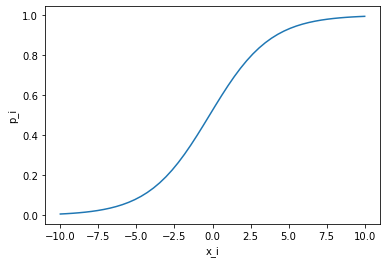

In [13]:
a = 0.1
b = 0.5

x_i = np.linspace(-10,10)

p_i = np.exp(a+b*x_i)/(1+np.exp(a+b*x_i))

plt.plot(x_i,p_i)
plt.xlabel('x_i')
plt.ylabel('p_i')
plt.show()



We recognize that the link function creates a non-linear association between $x_i$ and $p_i$, where $p_i$ is indeed bounded by 0 and 1. Importantly, although the association is linear, a unit increase in $x$ does not correspond anymore to a unit increase in the output. The magnitude of the association depends on the value of $x$ itself, and is greater in correspondence of the maximum slope of the curve. 

This kind of model is called *logistic regression*. 

## Example: Logistic regression for predicting Alzheimer's disease

In [14]:
data = pd.read_csv('adni_data')
pd.set_option('mode.chained_assignment', None) 

data_ct_ad = data.query('DX == 1 | DX == 3') 
data_ct_ad['DX'] = data_ct_ad['DX'].map({1: 0, 3: 1})

data_ct_ad['norm_brain'] = data_ct_ad['WholeBrain.bl']/data_ct_ad['ICV']
data_ct_ad['norm_brain'] = (data_ct_ad['norm_brain'] - np.mean(data_ct_ad['norm_brain']))/np.std(data_ct_ad['norm_brain'])
data_ct_ad.dropna(inplace = True)


print(data_ct_ad[:5])

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


   RID  APOE4  DX   AGE  WholeBrain.bl           ICV  norm_brain
0    2    0.0   0  74.3      1229738.0  1.984657e+06   -0.907716
1    3    1.0   1  81.3      1129834.0  1.920691e+06   -1.508346
3    5    0.0   0  73.7      1116633.0  1.640766e+06    0.258629
5    7    1.0   1  75.4       875798.0  1.353519e+06   -0.382669
6    8    0.0   0  84.5       948684.0  1.396068e+06    0.239182


In [15]:
binomial_model_code = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
  real mu_a;
  real<lower=0> std_a;
  real mu_b;
  real<lower=0> std_b;
}
parameters {
  real a;
  real b;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i])/(1 + exp(a + b * x[i])); 
    }
}
model {
  b ~ normal(mu_b, std_b);
  a ~ normal(mu_a, std_a);
  y ~ binomial(1, p_i);
}
"""
model = pystan.StanModel(model_code = binomial_model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_412ab0b943fbbb6e1bdcf98b815ee879 NOW.


In [16]:
data_to_stan = dict(x = data_ct_ad['norm_brain'], y = data_ct_ad['DX'], 
                    mu_a = 0, std_a = 10, mu_b = 0, std_b = 10, N = len(data_ct_ad['DX']))

fit = model.sampling(data = data_to_stan, seed = int(1), iter=4000, chains=4)

In [17]:
pystan.check_hmc_diagnostics(fit)

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

In [18]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_412ab0b943fbbb6e1bdcf98b815ee879.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        -0.58  1.1e-3   0.08  -0.75  -0.64  -0.58  -0.53  -0.42   5865    1.0
b        -1.15  1.3e-3    0.1  -1.35  -1.22  -1.15  -1.09  -0.97   6009    1.0
p_i[1]    0.61  2.8e-4   0.03   0.57    0.6   0.61   0.63   0.66   8226    1.0
p_i[2]    0.76  3.1e-4   0.03    0.7   0.74   0.76   0.78   0.81   7778    1.0
p_i[3]    0.29  2.6e-4   0.02   0.26   0.28   0.29   0.31   0.33   5338    1.0
p_i[4]    0.47  2.4e-4   0.02   0.42   0.45   0.47   0.48   0.51   7284    1.0
p_i[5]     0.3  2.6e-4   0.02   0.26   0.29    0.3   0.31   0.34   5365    1.0
p_i[6]     0.2  2.7e-4   0.02   0.17   0.19    0.2   0.22   0.24   5088    1.0
p_i[7]     0.3  2.6e-4   0.02   0.26   0.29    0.3   0.31   

In [19]:
est_a = fit.extract()['a']
quantiles_a = np.quantile(est_a, [0.05, 0.5, 0.95])

est_b = fit.extract()['b']
quantiles_b = np.quantile(est_b, [0.05, 0.5, 0.95])

logistic_a_50 = np.exp(quantiles_a[1])/(1 + np.exp(quantiles_a[1]))
logistic_a_5 = np.exp(quantiles_a[0])/(1 + np.exp(quantiles_a[0]))
logistic_a_95 = np.exp(quantiles_a[2])/(1 + np.exp(quantiles_a[2]))

print('Baseline probability of disease: \n')
print('5%  :', logistic_a_5)
print('50% :', logistic_a_50)
print('95% :', logistic_a_95)


logistic_b_95 = np.exp(quantiles_a[0] - quantiles_b[0])/(1 + np.exp(quantiles_a[0] - quantiles_b[0]))
logistic_b_50 = np.exp(quantiles_a[0] - quantiles_b[1])/(1 + np.exp(quantiles_a[0] - quantiles_b[1]))
logistic_b_5 = np.exp(quantiles_a[0] - quantiles_b[2])/(1 + np.exp(quantiles_a[0] - quantiles_b[2]))


print('Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): \n')
print('5%  :', logistic_b_5)
print('50% :', logistic_b_50)
print('95% :', logistic_b_95)

Baseline probability of disease: 

5%  : 0.32764001421344385
50% : 0.35890869299045824
95% : 0.38960171666074866
Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): 

5%  : 0.5686363994816943
50% : 0.6068168807773046
95% : 0.6454404083613141


In [20]:
p_i = fit.extract()['p_i']

lppd = []
pwaic = []
for k in range(len(data_ct_ad)):
    id_log_lik = []
    for i in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[k], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic = -2 * (np.sum(lppd) -np.sum(pwaic))

What happens when we include another predictor, for example the presence of the genetic mutation APOE4?

In [21]:
binomial_model_two_pred_code = """
data {
  int<lower=1> N;
  int y[N];
  real x_b[N];
  real x_g[N];
  real mu_a;
  real<lower=0> std_a;
  real mu_b;
  real<lower=0> std_b;
  real mu_c;
  real<lower=0> std_c;
}
parameters {
  real a;
  real b;
  real c;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x_b[i] + c * x_g[i])/(1 + exp(a + b * x_b[i] + c * x_g[i])); 
    }
}
model {
  a ~ normal(mu_a, std_a);
  b ~ normal(mu_b, std_b);
  c ~ normal(mu_c, std_c);
  y ~ binomial(1, p_i);
}
"""
model = pystan.StanModel(model_code = binomial_model_two_pred_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0ba10ec4a771726050e0f42751936e2 NOW.


In [22]:
data_to_stan = dict(x_b = data_ct_ad['norm_brain'], x_g = data_ct_ad['APOE4'], 
                    y = data_ct_ad['DX'], 
                    mu_a = 0, std_a = 10, mu_b = 0, std_b = 10,  mu_c = 0, std_c = 10, 
                    N = len(data_ct_ad['DX']))

fit_apoe = model.sampling(data = data_to_stan, seed = int(1), iter=4000, chains=4)

In [23]:
fit_apoe


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_c0ba10ec4a771726050e0f42751936e2.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        -1.48  1.9e-3   0.13  -1.73  -1.56  -1.47  -1.39  -1.24   4390    1.0
b        -1.25  1.6e-3   0.11  -1.46  -1.32  -1.24  -1.17  -1.04   4557    1.0
c         1.58  2.2e-3   0.15   1.29   1.48   1.58   1.68   1.87   4396    1.0
p_i[1]    0.41  4.2e-4   0.03   0.35   0.39   0.41   0.44   0.48   5763    1.0
p_i[2]    0.88  2.7e-4   0.02   0.83   0.86   0.88   0.89   0.92   5665    1.0
p_i[3]    0.14  2.6e-4   0.02   0.11   0.13   0.14   0.15   0.18   4189    1.0
p_i[4]    0.64  2.9e-4   0.03   0.59   0.62   0.64   0.66   0.69   8896    1.0
p_i[5]    0.15  2.6e-4   0.02   0.11   0.13   0.15   0.16   0.18   4200    1.0
p_i[6]    0.32  3.5e-4   0.03   0.27    0.3   0.32   0.34   

Is this model better fitting the diagnosis than the previous one?

In [24]:
p_i = fit_apoe.extract()['p_i']

lppd = []
pwaic = []
for k in range(len(data_ct_ad)):
    id_log_lik = []
    for i in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[k], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic_apoe = -2 * (np.sum(lppd) - np.sum(pwaic))

In [25]:
waic

922.3275650382813

In [26]:
waic_apoe

782.5530591141612